## Importing the dataset:

In [28]:
import pandas as pd
file = "C:\\Users\\pbhar\\kdrama movies.csv"
df = pd.read_csv(file)
df.head(20)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,14-May-21,2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
5,Reply 1988,"Nov 6, 2015 - Jan 16, 2016",2015,tvN,"Friday, Saturday",20,1 hr. 40 min.,15+ - Teens 15 or older,9.1,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Shin Won Ho, Yoo Hak Chan",Lee Woo Jung,"Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",CJ ENM,#6
6,Weak Hero Class 1,18-Nov-22,2022,Wavve,Friday,8,40 min.,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,#7
7,Prison Playbook,"Nov 22, 2017 - Jan 18, 2018",2017,"Netflix, tvN","Wednesday, Thursday",16,1 hr. 32 min.,15+ - Teens 15 or older,9.1,"Kim Je Hyuk, a famous baseball player, is arre...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",Shin Won Ho,"Jung Bo Hoon, Lee Woo Jung","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...",tvN,#8
8,Alchemy of Souls,"Jun 18, 2022 - Aug 28, 2022",2022,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,9.0,Set in a fictional country called Daeho that d...,"Action, Historical, Romance, Fantasy","Magical Power, Supernatural, Transmigration, S...",Park Joon Hwa,"Hong Jung Eun, Hong Mi Ran","Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shi...","Studio Dragon, High Quality",#9
9,Extraordinary Attorney Woo,"Jun 29, 2022 - Aug 18, 2022",2022,"ENA, Netflix","Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.0,"Diagnosed with autism spectrum disorder, 27-ye...","Law, Romance, Life, Drama","Autistic Female Lead, Autism, Attorney Female...",Yoo In Shik,Moon Ji Won,"Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon...","AStory, KT Studio Genie, Nangman Crew",#10


## Stopwords Removal: 

In [29]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'be', "she's", "weren't", 'here', 'll', 'her', 'd', 'below', 'those', 'between', 'how', 'it', 'wouldn', 'then', 'can', 'until', 'does', 'where', 'you', 'doing', 'same', 'which', 'both', 'was', 'didn', 'him', 'for', "mightn't", 'in', 'only', 'yourselves', 'when', "shan't", 'before', 'over', 'too', 'ain', 'some', 't', "isn't", 'through', 'above', 'yourself', 'did', 'from', 'won', 'your', "you've", 'am', 'so', 'm', 'out', 'me', 'do', 'will', 'they', "hadn't", 'don', 'shouldn', 'other', 'there', 'ourselves', 've', 'why', "hasn't", 'these', 'themselves', 'about', 'having', 'down', 'an', 'any', "that'll", 'while', 'than', 'into', 'more', 'isn', 'haven', 'been', 'on', 'who', 'has', 'hadn', "wasn't", 'further', 'own', "couldn't", "it's", 'of', 'ours', 'itself', 'or', 'during', 'o', "haven't", 'the', 'off', 'hasn', 'aren', 'we', "you'll", 'if', 'my', 'because', 'weren', 'but', 'are', 'such', 'them', 'with', 'most', 'their', 'our', 'just', "mustn't", "won't", "you'd", "wouldn't", 'each', 'shoul

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization

In [30]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]


In [31]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Synopsis'].apply(prepare, pipeline=pipeline)


## Token counting:

In [32]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq>=1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq',ascending =False)
freq_df.head(10)

,freq
token,
life,111
one,79
young,77
family,66
love,61
years,61
kang,60
woo,58
lee,56


## Word cloud Generation:

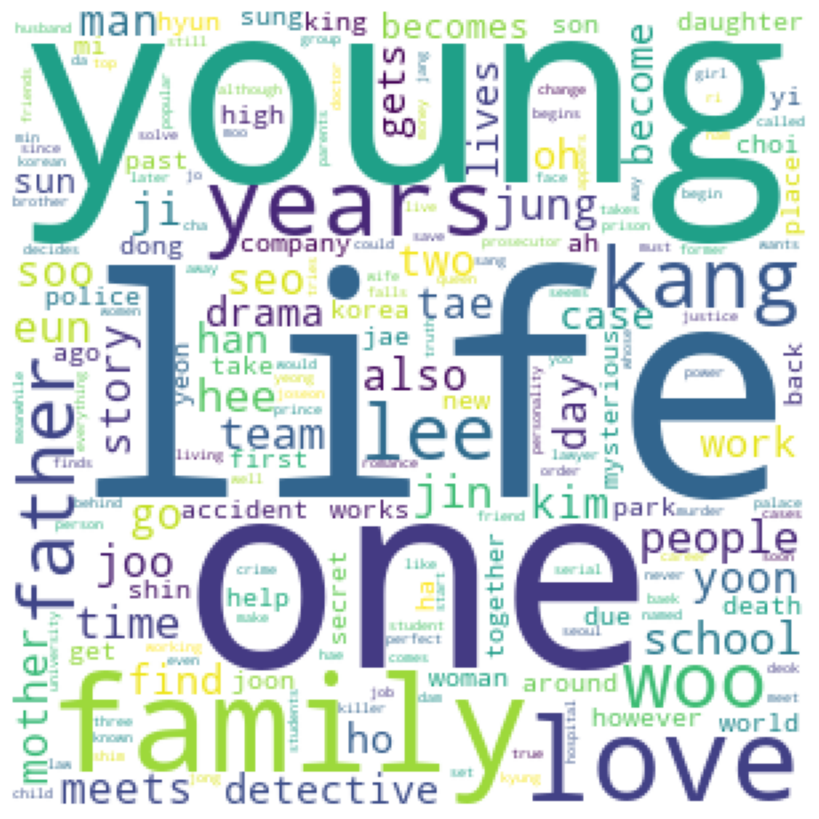

In [33]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## TF-IDF calculation:

In [34]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
   # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [35]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
life,111,140.387482
one,79,109.600999
young,77,127.140013
family,66,116.906679
love,61,103.067752


## Word cloud based on TFIDF

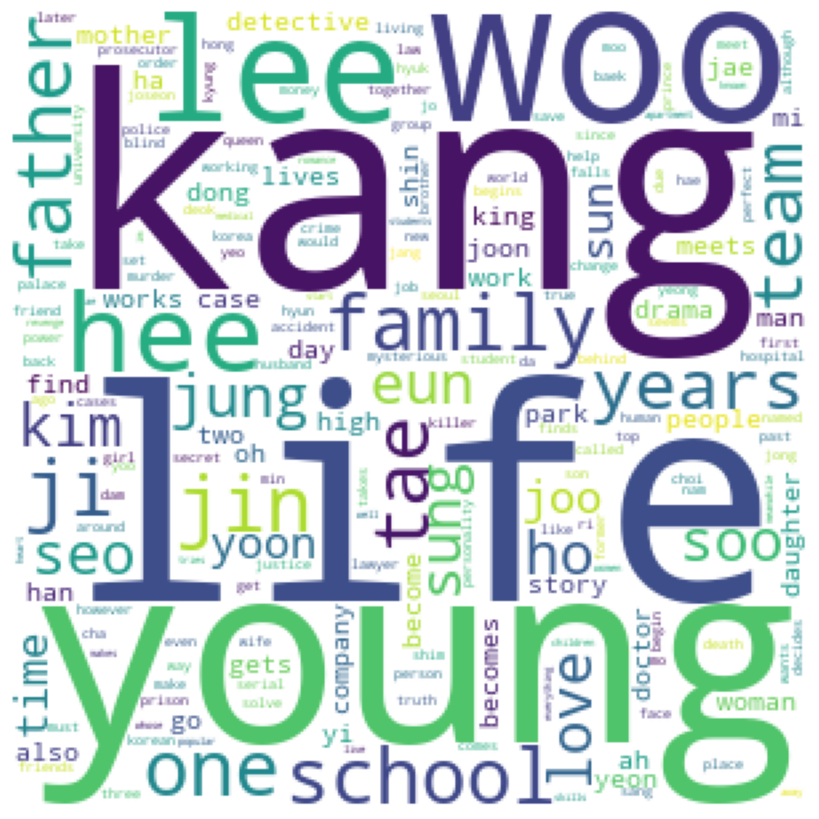

In [36]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [37]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


## Grouping by year

In [38]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


## Visualization of Keyword Frequencies: 

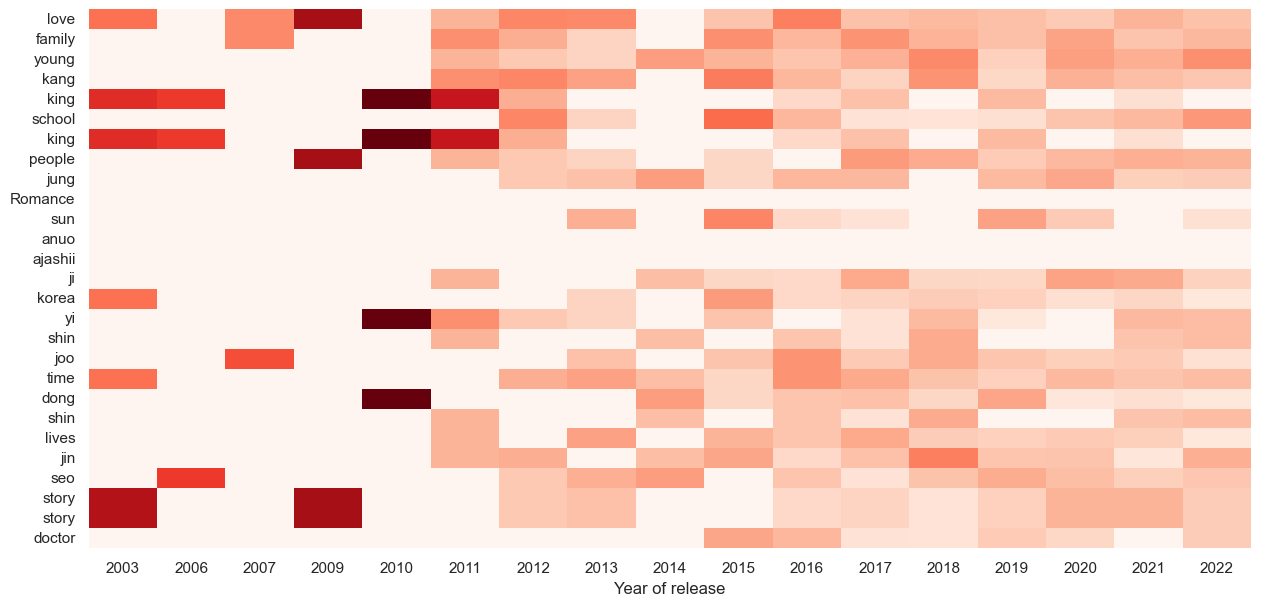

In [39]:
import seaborn as sns
keywords = ['love', 'family', 'young', 'kang',
            'king', 'school', 'king', 'people', 'jung', 
            'Romance', 'sun', 'anuo','ajashii', 'ji','korea',
            'yi','shin','joo','time','dong','shin','lives','jin',
            'seo','story','story','doctor']  
freq_df = count_keywords_by(df, by='Year of release', keywords=keywords)
# compute relative frequencies based on total number of to,kens per year
freq_df = freq_df.div(df.groupby('Year of release')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)